In [1]:
import os

In [2]:
os.system('make')
os.system('./TwoBody')

0

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
raw1 = np.loadtxt('data_task2/R_V')
t, r1, r2 = raw1[:, 0], raw1[:, 1:3], raw1[:, 3:5]
v1, v2 = raw1[:, 5:7], raw1[:, 7:9]

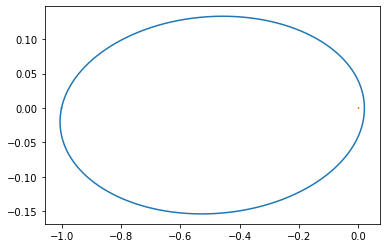

In [5]:
plt.plot(r1[:, 0], r1[:, 1])
plt.plot(r2[:, 0], r2[:, 1])

In [6]:
(r1-r2)

array([[-1.00000000e+00,  0.00000000e+00],
       [-9.99899500e-01,  1.99999970e-04],
       [-9.99798000e-01,  3.99999739e-04],
       ...,
       [-1.00024429e+00, -4.94699817e-04],
       [-1.00014627e+00, -2.94700212e-04],
       [-1.00004724e+00, -9.47003127e-05]])